In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the dataset, renaming as paths, columns as necessary
# Below is example using every usable feature from merged_dataset to predict mean obesity pct; not very good
df = pd.read_csv('../data/data-state-for-processing/merged_dataset.csv')
df = df.drop(columns=['State', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0']).dropna()
X = df.drop(columns=['Mean_Obesity_Pct']) # input features
y = df['Mean_Obesity_Pct'] # output feature

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

Mean Squared Error: 6.283336303076445
R^2 Score: -0.20193507279181233
                                           Feature  Importance
30                          Mean_Fruit_Consump_Pct    0.237114
9                             Median_Family_Income    0.152186
15                               Vehicle_1_Percent    0.116898
13                            Population_1_Percent    0.086577
10                         Population_Half_Percent    0.062093
14                            Low_Income_1_Percent    0.060178
11                         Low_Income_Half_Percent    0.058816
0                                 Urban_Percentage    0.040748
12                            Vehicle_Half_Percent    0.031905
31                         Mean_Veggie_Consump_Pct    0.019298
19                          Farmers' markets, 2018    0.013891
18                          Farmers' markets, 2013    0.012129
2                                    Housing_Units    0.008791
21                     Fast-food restaurants, 20

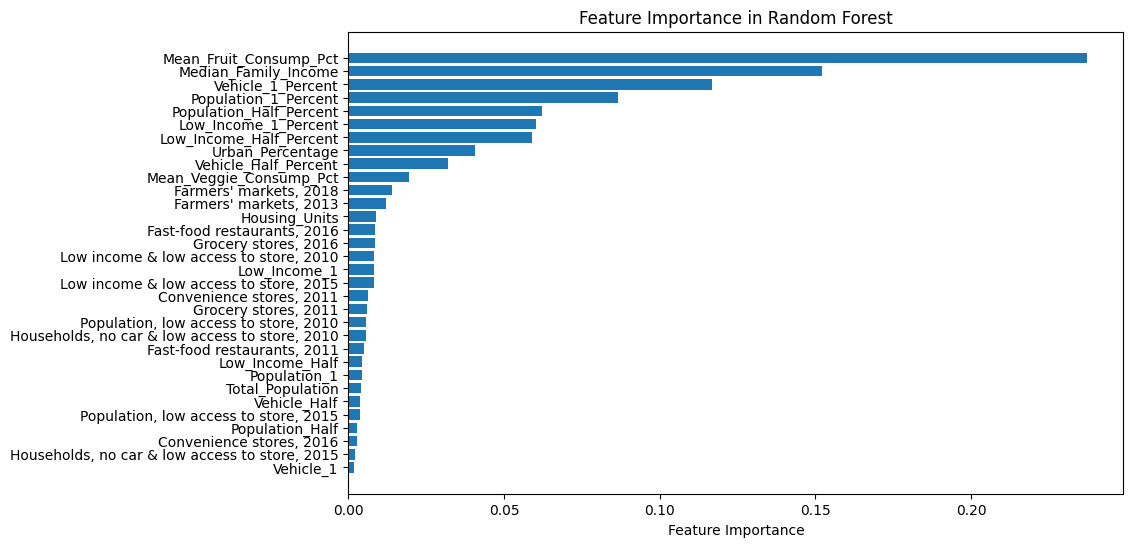

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Feature importance
importances = model.feature_importances_
feature_names = df.drop(columns=['Mean_Obesity_Pct']).columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()